In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

## load the saved results

In [5]:
density_level = "high"

In [6]:
data_path = "/sps/lsst/users/bbiswas/MADNESS_results/" + density_level + "_density"
run_name = "kl001" # 12 to 20 galaxies
result_dir_path = os.path.join(data_path, run_name)

In [7]:
madness_results=[]
scarlet_results=[]
actual_photometry = []
blended_photometry = []

for file_num in range(75):

    madness_results.append(pd.read_pickle(os.path.join(result_dir_path, "madness_results", str(file_num) + ".pkl")))
    scarlet_results.append(pd.read_pickle(os.path.join(data_path, "scarlet_results", str(file_num) + ".pkl")))

    actual_photometry.append(pd.read_pickle(os.path.join(data_path, "actual_photometry", str(file_num) + ".pkl")))
    blended_photometry.append(pd.read_pickle(os.path.join(data_path, "blended_photometry",  str(file_num) + ".pkl")))

madness_results = pd.concat(madness_results)
scarlet_results = pd.concat(scarlet_results)

actual_photometry = pd.concat(actual_photometry)
blended_photometry = pd.concat(blended_photometry)

In [8]:
mask=madness_results["r_contamination"].values<3
mask=madness_results["r_contamination"].values<3
madness_results=madness_results[mask]
scarlet_results=scarlet_results[mask]
actual_photometry=actual_photometry[mask]
blended_photometry=blended_photometry[mask]

In [9]:
madness_results.columns

Index(['u_covariance', 'u_actual_flux', 'u_predicted_flux', 'u_blendedness',
       'g_covariance', 'g_actual_flux', 'g_predicted_flux', 'g_blendedness',
       'r_covariance', 'r_actual_flux', 'r_predicted_flux', 'r_blendedness',
       'i_covariance', 'i_actual_flux', 'i_predicted_flux', 'i_blendedness',
       'z_covariance', 'z_actual_flux', 'z_predicted_flux', 'z_blendedness',
       'y_covariance', 'y_actual_flux', 'y_predicted_flux', 'y_blendedness',
       'galaxy_num', 'size', 'field_num', 'file_num', 'r_band_snr', 'ref_mag',
       'u_ab', 'g_ab', 'r_ab', 'i_ab', 'z_ab', 'y_ab', 'u_phot_flux',
       'u_phot_fluxerrs', 'u_phot_flags', 'g_phot_flux', 'g_phot_fluxerrs',
       'g_phot_flags', 'r_phot_flux', 'r_phot_fluxerrs', 'r_phot_flags',
       'i_phot_flux', 'i_phot_fluxerrs', 'i_phot_flags', 'z_phot_flux',
       'z_phot_fluxerrs', 'z_phot_flags', 'y_phot_flux', 'y_phot_fluxerrs',
       'y_phot_flags', 'r_contamination'],
      dtype='object')

In [10]:
# mask=madness_results['r_ab'].values<26
# mask=madness_results['r_ab'].values<26
# madness_results=madness_results[mask]
# scarlet_results=scarlet_results[mask]
# actual_photometry=actual_photometry[mask]
# blended_photometry=blended_photometry[mask]

In [11]:
import maddeb.boxplot
import matplotlib as mpl

# Perpare data for plots

In [12]:
import astropy.units as u
import galcheat

In [13]:
madness_results.columns

Index(['u_covariance', 'u_actual_flux', 'u_predicted_flux', 'u_blendedness',
       'g_covariance', 'g_actual_flux', 'g_predicted_flux', 'g_blendedness',
       'r_covariance', 'r_actual_flux', 'r_predicted_flux', 'r_blendedness',
       'i_covariance', 'i_actual_flux', 'i_predicted_flux', 'i_blendedness',
       'z_covariance', 'z_actual_flux', 'z_predicted_flux', 'z_blendedness',
       'y_covariance', 'y_actual_flux', 'y_predicted_flux', 'y_blendedness',
       'galaxy_num', 'size', 'field_num', 'file_num', 'r_band_snr', 'ref_mag',
       'u_ab', 'g_ab', 'r_ab', 'i_ab', 'z_ab', 'y_ab', 'u_phot_flux',
       'u_phot_fluxerrs', 'u_phot_flags', 'g_phot_flux', 'g_phot_fluxerrs',
       'g_phot_flags', 'r_phot_flux', 'r_phot_fluxerrs', 'r_phot_flags',
       'i_phot_flux', 'i_phot_fluxerrs', 'i_phot_flags', 'z_phot_flux',
       'z_phot_fluxerrs', 'z_phot_flags', 'y_phot_flux', 'y_phot_fluxerrs',
       'y_phot_flags', 'r_contamination'],
      dtype='object')

In [14]:
survey = galcheat.helpers.get_survey("LSST")

for band in ["u", "g", "r", "i", "y", "z"]:

    z_point = survey.get_filter(band).zeropoint
    exp_time = survey.get_filter(band).full_exposure_time

    actual_phot_mag = actual_photometry[f"{band}_phot_flux"].values
    actual_photometry[f"{band}_phot_mag"] = ((actual_phot_mag * u.electron / exp_time).to(u.mag(u.electron / u.s)) 
     + z_point).value
    
    blended_phot_mag = blended_photometry[f"{band}_phot_flux"].values
    blended_photometry[f"{band}_phot_mag"] = ((blended_phot_mag * u.electron / exp_time).to(u.mag(u.electron / u.s)) 
     + z_point).value

    madness_phot_mag = madness_results[f"{band}_phot_flux"].values
    madness_results[f"{band}_phot_mag"] = ((madness_phot_mag * u.electron / exp_time).to(u.mag(u.electron / u.s)) 
     + z_point ).value
    
    scarlet_phot_mag = scarlet_results[f"{band}_phot_flux"].values
    scarlet_results[f"{band}_phot_mag"] = ((scarlet_phot_mag * u.electron / exp_time).to(u.mag(u.electron / u.s)) 
     + z_point).value

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/astropy/units/function/logarithmic.py:47: RuntimeWarning: invalid value encountered in log10
  return dex.to(self._function_unit, np.log10(x))
/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/astropy/units/function/logarithmic.py:47: RuntimeWarning: invalid value encountered in log10
  return dex.to(self._function_unit, np.log10(x))
/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/astropy/units/function/logarithmic.py:47: RuntimeWarning: invalid value encountered in log10
  return dex.to(self._function_unit, np.log10(x))
/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/astropy/units/function/logarithmic.py:47: RuntimeWarning: invalid value encountered in log10
  return dex.to(self._function_unit, np.log10(x))
/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/astropy/units

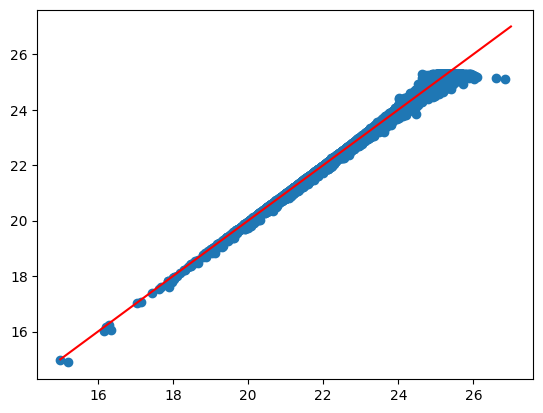

In [15]:
plt.scatter(actual_photometry["i_phot_mag"], madness_results["i_ab"])
plt.plot([15,27],[15,27], color="r")

In [16]:
color_bands="gr"

In [17]:
color_bands[0]

'g'

In [18]:
phot_color = actual_photometry[color_bands[0]+"_phot_mag"].values - actual_photometry[color_bands[1]+"_phot_mag"].values
true_color = madness_results[color_bands[0]+"_ab"].values - madness_results[color_bands[1] + "_ab"].values
blended_color = blended_photometry[color_bands[0]+"_phot_mag"].values - actual_photometry[color_bands[1]+"_phot_mag"].values

madness_results[color_bands+'_color'] = madness_results[color_bands[0]+"_phot_mag"] - madness_results[color_bands[1]+"_phot_mag"]
scarlet_results[color_bands+'_color'] = scarlet_results[color_bands[0]+"_phot_mag"] - scarlet_results[color_bands[1]+"_phot_mag"]

In [19]:
boxplot_color_df = {}

boxplot_color_df["snr"] = list(madness_results['r_band_snr'])
boxplot_color_df['r_blendedness'] = list(madness_results['r_blendedness'])
boxplot_color_df['r_contamination'] = list(madness_results['r_contamination'])
boxplot_color_df["type"] = ["madness"] * len(madness_results['size'])
boxplot_color_df[color_bands+'_color_err_phot'] = list(madness_results[color_bands+'_color'].values-phot_color)
boxplot_color_df[color_bands+'_color_err_true'] = list(madness_results[color_bands+'_color'].values-true_color)
boxplot_color_df[color_bands+'_phot'] = list(phot_color)
boxplot_color_df[color_bands+'_truth'] = list(true_color)

boxplot_color_df["snr"].extend(list(scarlet_results['r_band_snr']))
boxplot_color_df['r_blendedness'].extend(list(scarlet_results['r_blendedness']))
boxplot_color_df['r_contamination'].extend(list(madness_results['r_contamination']))
boxplot_color_df["type"].extend(["scarlet"] * len(scarlet_results['size']))
boxplot_color_df[color_bands+'_color_err_phot'].extend(list(scarlet_results[color_bands+'_color'].values-phot_color))
boxplot_color_df[color_bands+'_color_err_true'].extend(list(scarlet_results[color_bands+'_color'].values-true_color))
boxplot_color_df[color_bands+'_phot'].extend(list(phot_color))
boxplot_color_df[color_bands+'_truth'].extend(list(true_color))

boxplot_color_df["snr"].extend(list(scarlet_results['r_band_snr']))
boxplot_color_df['r_blendedness'].extend(list(scarlet_results['r_blendedness']))
boxplot_color_df['r_contamination'].extend(list(madness_results['r_contamination']))
boxplot_color_df["type"].extend(["blended"] * len(scarlet_results['size']))
boxplot_color_df[color_bands+'_color_err_phot'].extend(list(blended_color-phot_color))
boxplot_color_df[color_bands+'_color_err_true'].extend(list(blended_color-true_color))
boxplot_color_df[color_bands+'_phot'].extend(list(phot_color))
boxplot_color_df[color_bands+'_truth'].extend(list(true_color))
boxplot_color_df[color_bands+'_phot_bias'] = list(np.array(boxplot_color_df[color_bands+'_phot']) - np.array(boxplot_color_df[color_bands+'_truth']))

boxplot_color_df = pd.DataFrame(boxplot_color_df)

# Estimate bias in Aperture photometry colors

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


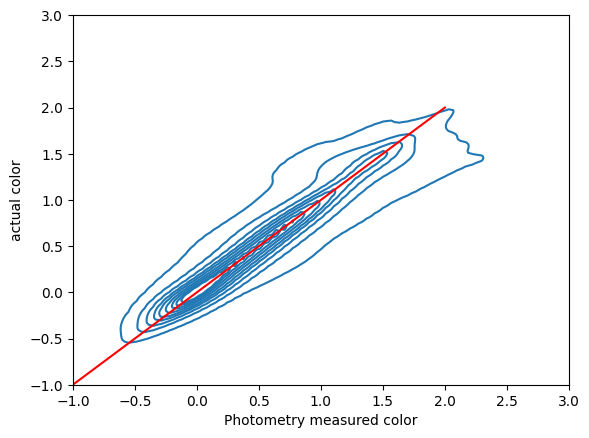

In [20]:
sns.kdeplot(phot_color[:10000], true_color[:10000])
plt.xlabel("Photometry measured color")
plt.ylabel("actual color")
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.plot(np.arange(-1,3),np.arange(-1,3),color='r')

['madness']


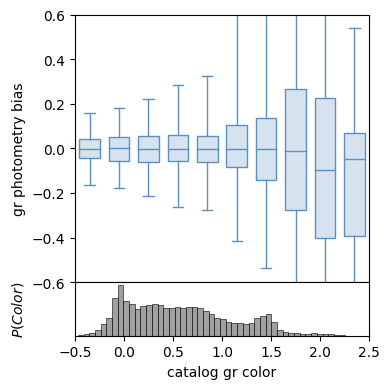

In [21]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_color_df[boxplot_color_df["type"] == "madness"], 
    x = color_bands+"_truth", y = color_bands+"_phot_bias", z = "type",
    xlim = (-.5, 2.5),
    ylim = (-.6, .6), 
    x_scale = None,
    legend = ['madness', 'scarlet'],
    x_label=f"catalog {color_bands} color", 
    y_label = f'{color_bands} photometry bias',
    y_label_hist=r'$P(Color)$',
    legend_remove = True,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85,0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "bias_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "bias_color_box_plot.png"))

['madness']


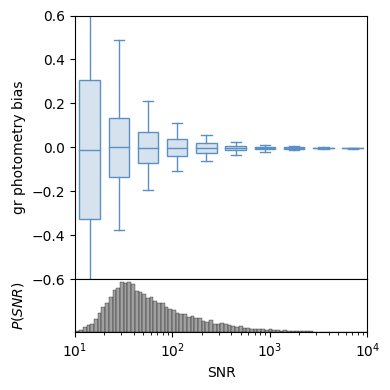

In [22]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_color_df[boxplot_color_df["type"] == "madness"], 
    x = "snr", y = color_bands + "_phot_bias", z = "type",
    xlim = (10, 10000),
    ylim = (-.6, .6), 
    x_scale = "log",
    legend = ['madness', 'scarlet', 'blended'],
    x_label='SNR', 
    y_label = f'{color_bands} photometry bias',
    y_label_hist=r'$P(SNR)$',
    legend_remove = True,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85,0.35, .15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "bias_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "bias_color_box_plot.png"))

# Errors from deblender against actual color from catalog

In [23]:
current_boxplot_color_df = {}
current_boxplot_color_df["snr"] = list(madness_results['r_band_snr'])
current_boxplot_color_df['r_blendedness'] = list(madness_results['r_blendedness'])
current_boxplot_color_df['r_contamination'] = list(madness_results['r_contamination'])
current_boxplot_color_df["type"] = ["Phot mesured"] * len(madness_results['size'])
current_boxplot_color_df[color_bands+'_color_err_true'] = phot_color-true_color
current_boxplot_color_df[color_bands+'_phot'] = list(phot_color)
current_boxplot_color_df[color_bands+'_truth'] = list(true_color)

current_boxplot_color_df = pd.DataFrame(current_boxplot_color_df)

In [24]:
current_boxplot_color_df = pd.concat([current_boxplot_color_df, boxplot_color_df], join='inner')

In [25]:
index = current_boxplot_color_df["type"].isin(['Phot mesured', 'madness', 'scarlet'])

### The three bars in the plot below are 
- error color as measured by apperture photometry on isolated galaxies 
- error on deblended galaxies from madness
- error on deblended galaxies from scarlet

['Phot mesured' 'madness' 'scarlet']


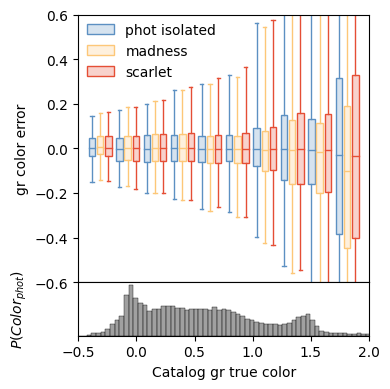

In [26]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    current_boxplot_color_df[index], 
    x = color_bands+"_truth", y = color_bands+'_color_err_true', z = "type",
    xlim = (-.5, 2),
    ylim = (-.6, .6), 
    x_scale = None,
    legend = ['phot isolated', 'madness', 'scarlet'],
    x_label=f'Catalog {color_bands} true color', 
    y_label = color_bands + ' color error',
    y_label_hist=r'$P(Color_{phot})$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85, .35, 0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "bias_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "bias_color_box_plot.png"))

['Phot mesured' 'madness' 'scarlet']


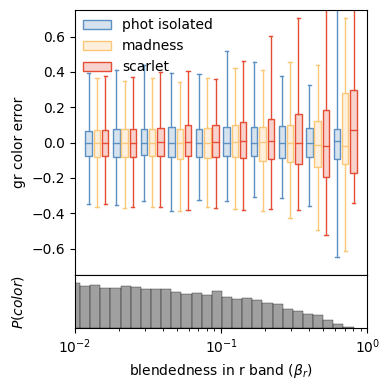

In [27]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    current_boxplot_color_df[index], 
    x = "r_blendedness", y = color_bands + '_color_err_true', z = "type",
    xlim = (1e-2, 1),
    ylim = (-.75, .75), 
    x_scale = 'log',
    legend = ['phot isolated', 'madness', 'scarlet'],
    x_label=r'blendedness in r band ($\beta_r$)', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(color)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85, 0.35, 0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "blendedness_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "blendedness_color_box_plot.png"))

['Phot mesured' 'madness' 'scarlet']


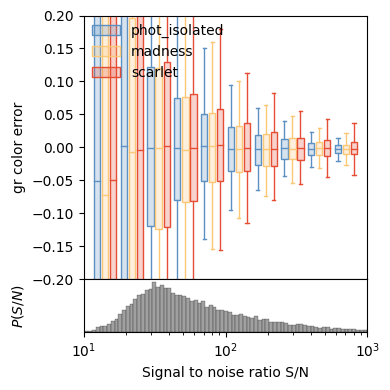

In [28]:
fig, median_fluxerr, q1_fluxerr, q3_fluxerr, whislo_fluxerr, whishi_fluxerr = maddeb.boxplot.boxplot_func(
    current_boxplot_color_df[index], 
    x = 'snr', y = color_bands + "_color_err_true", z = "type",
    xlim = (10, 1000),
    ylim = (-.2, 0.2), 
    x_scale = 'log',
    legend = ['phot_isolated', 'madness', 'scarlet'],
    x_label='Signal to noise ratio S/N', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(S/N)$',
    legend_remove = False,
    whis = [5,95],
    percents = [25,75],
    palette = mpl.cm.RdYlBu([0.85, 0.35, 0.15]),#0.35,
    nbins = 10
)

plt.savefig(os.path.join("results", density_level + "_density", "snr_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density", "snr_color_box_plot.png"))

['Phot mesured' 'madness' 'scarlet']


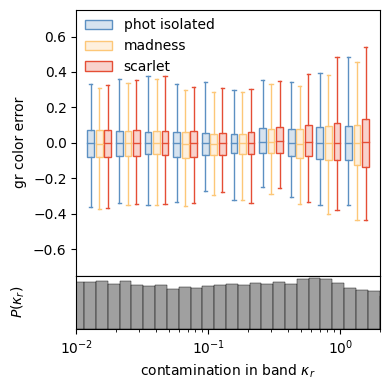

In [29]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    current_boxplot_color_df[index], 
    x = 'r_contamination', y = f"{color_bands}_color_err_true", z = "type",
    xlim = (1e-2, 2),
    ylim = (-.75, .75), 
    x_scale = 'log',
    legend = ['phot isolated', 'madness', 'scarlet'],
    x_label=r'contamination in band $\kappa_r$', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(\kappa_r)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85, 0.35, 0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "contamination_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "contamination_color_box_plot.png"))

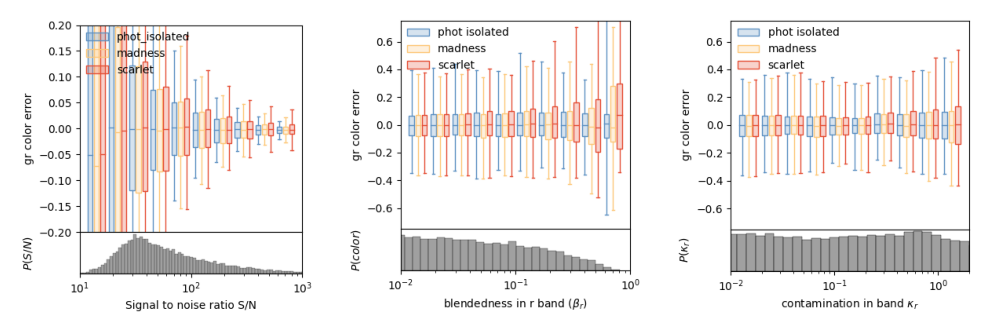

In [30]:
f, axarr = plt.subplots(1, 3, figsize=(10, 15))

#axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
axarr[0].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "snr_color_box_plot.png")))
axarr[1].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "blendedness_color_box_plot.png")))
axarr[2].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "contamination_color_box_plot.png")))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()

plt.savefig("results/" + density_level + "_density/" + density_level + "_density_color_boxplot_results.pdf", format="pdf", bbox_inches="tight")
plt.savefig("results/" + density_level + "_density/" + density_level + "_density_color_boxplot_results.png")

plt.show()

## Repeating the same, but time replace the phot measured color on isolated galaxies with blended galaxies

### The three bars in the plot below are 
- error on phot measured color on blended galaxies
- error on deblended galaxies from madness
- error on deblended galaxies from scarlet

['blended' 'madness' 'scarlet']


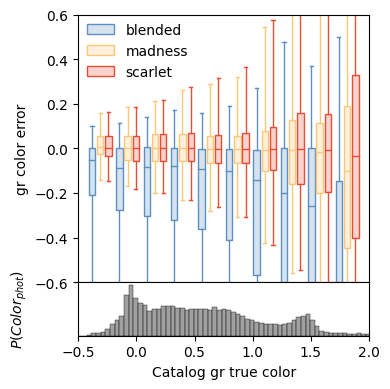

In [31]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_color_df, 
    x = color_bands+"_truth", y = color_bands+'_color_err_true', z = "type",
    xlim = (-.5, 2),
    ylim = (-.6, .6), 
    x_scale = None,
    legend = ['blended', 'madness', 'scarlet'],
    x_label=f'Catalog {color_bands} true color', 
    y_label = color_bands + ' color error',
    y_label_hist=r'$P(Color_{phot})$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85, .35, 0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "bias_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "bias_color_box_plot.png"))

['blended' 'madness' 'scarlet']


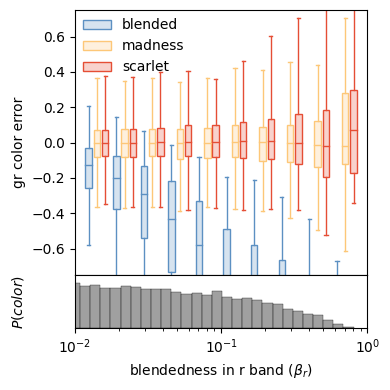

In [32]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_color_df, 
    x = "r_blendedness", y = color_bands + '_color_err_true', z = "type",
    xlim = (1e-2, 1),
    ylim = (-.75, .75), 
    x_scale = 'log',
    legend = ['blended', 'madness', 'scarlet'],
    x_label=r'blendedness in r band ($\beta_r$)', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(color)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85, 0.35, 0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "blendedness_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "blendedness_color_box_plot.png"))

['blended' 'madness' 'scarlet']


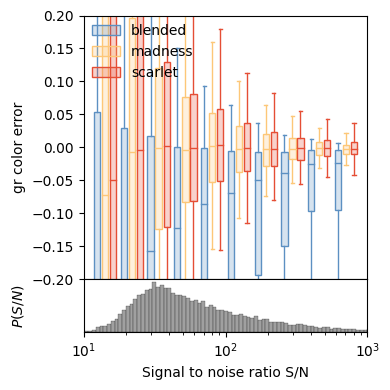

In [33]:
fig, median_fluxerr, q1_fluxerr, q3_fluxerr, whislo_fluxerr, whishi_fluxerr = maddeb.boxplot.boxplot_func(
    boxplot_color_df, 
    x = 'snr', y = color_bands + "_color_err_true", z = "type",
    xlim = (10, 1000),
    ylim = (-.2, 0.2), 
    x_scale = 'log',
    legend = ['blended', 'madness', 'scarlet'],
    x_label='Signal to noise ratio S/N', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(S/N)$',
    legend_remove = False,
    whis = [5,95],
    percents = [25,75],
    palette = mpl.cm.RdYlBu([0.85, 0.35, 0.15]),#0.35,
    nbins = 10
)

plt.savefig(os.path.join("results", density_level + "_density", "snr_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density", "snr_color_box_plot.png"))

['blended' 'madness' 'scarlet']


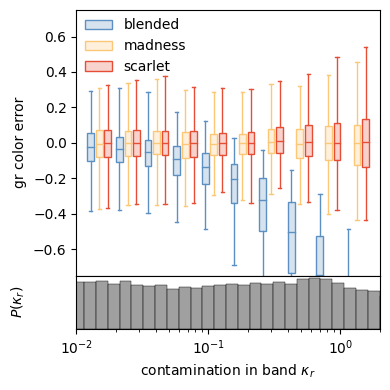

In [34]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_color_df, 
    x = 'r_contamination', y = f"{color_bands}_color_err_true", z = "type",
    xlim = (1e-2, 2),
    ylim = (-.75, .75), 
    x_scale = 'log',
    legend = ['blended', 'madness', 'scarlet'],
    x_label=r'contamination in band $\kappa_r$', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(\kappa_r)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85, 0.35, 0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "contamination_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "contamination_color_box_plot.png"))

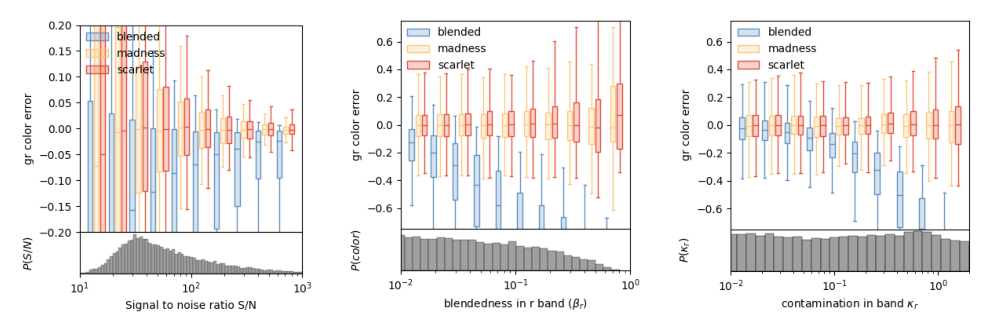

In [35]:
f, axarr = plt.subplots(1, 3, figsize=(10, 15))

#axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
axarr[0].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "snr_color_box_plot.png")))
axarr[1].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "blendedness_color_box_plot.png")))
axarr[2].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "contamination_color_box_plot.png")))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()

plt.savefig("results/" + density_level + "_density/" + density_level + "_density_color_boxplot_results.pdf", format="pdf", bbox_inches="tight")
plt.savefig("results/" + density_level + "_density/" + density_level + "_density_color_boxplot_results.png")

plt.show()

# Errors from deblender against photometry measured color
### replacing the x axis with photometry measured color on isolated galaxiesinstead of catalog truth color

In [36]:
mask=boxplot_color_df["type"].isin(['madness', 'scarlet'])

['madness' 'scarlet']


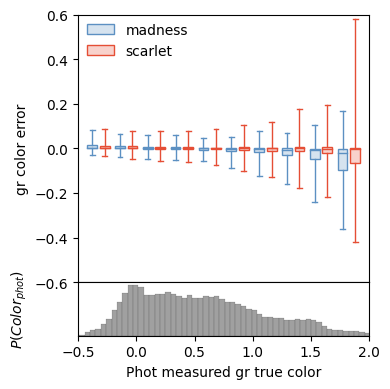

In [37]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_color_df[mask], 
    x = color_bands+"_phot", y = color_bands + "_color_err_phot", z = "type",
    xlim = (-.5, 2),
    ylim = (-.6, .6), 
    x_scale = None,
    legend = ['madness', 'scarlet'],
    x_label=f'Phot measured {color_bands} true color', 
    y_label = color_bands + ' color error',
    y_label_hist=r'$P(Color_{phot})$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85,0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "bias_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "bias_color_box_plot.png"))

['madness' 'scarlet']


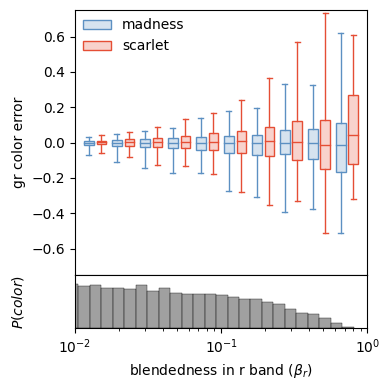

In [38]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_color_df[mask], 
    x = "r_blendedness", y = color_bands + "_color_err_phot", z = "type",
    xlim = (1e-2, 1),
    ylim = (-.75, .75), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label=r'blendedness in r band ($\beta_r$)', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(color)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85,0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "blendedness_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "blendedness_color_box_plot.png"))

['madness' 'scarlet']


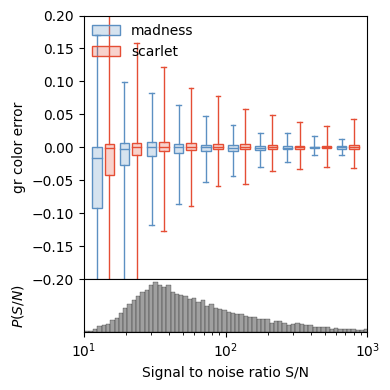

In [39]:
fig, median_fluxerr, q1_fluxerr, q3_fluxerr, whislo_fluxerr, whishi_fluxerr = maddeb.boxplot.boxplot_func(
    boxplot_color_df[mask], 
    x = 'snr', y = color_bands + "_color_err_phot", z = "type",
    xlim = (10, 1000),
    ylim = (-.2, 0.2), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label='Signal to noise ratio S/N', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(S/N)$',
    legend_remove = False,
    whis = [5,95],
    percents = [25,75],
    palette = mpl.cm.RdYlBu([0.85,0.15]),#0.35,
    nbins = 10
)

plt.savefig(os.path.join("results", density_level + "_density", "snr_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density", "snr_color_box_plot.png"))

['madness' 'scarlet']


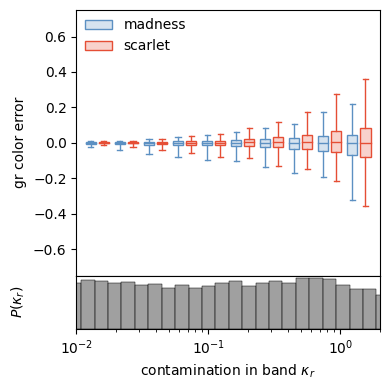

In [40]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_color_df[mask], 
    x = 'r_contamination', y = f"{color_bands}_color_err_phot", z = "type",
    xlim = (1e-2, 2),
    ylim = (-.75, .75), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label=r'contamination in band $\kappa_r$', 
    y_label = f'{color_bands} color error',
    y_label_hist=r'$P(\kappa_r)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85,0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "contamination_color_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "contamination_color_box_plot.png"))

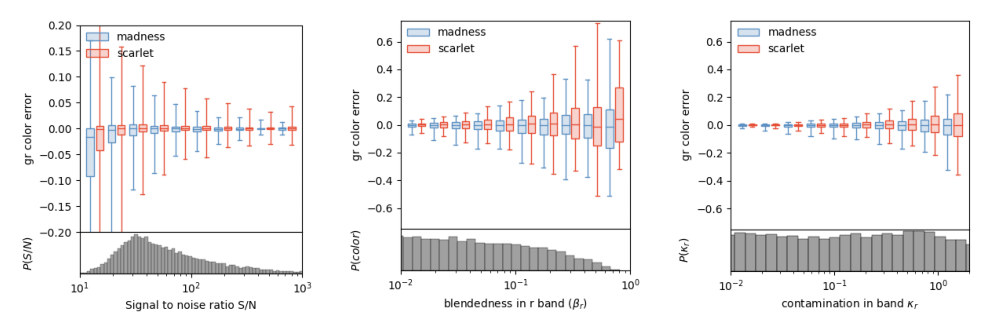

In [41]:
f, axarr = plt.subplots(1, 3, figsize=(10, 15))

#axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
axarr[0].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "snr_color_box_plot.png")))
axarr[1].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "blendedness_color_box_plot.png")))
axarr[2].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "contamination_color_box_plot.png")))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()

plt.savefig("results/" + density_level + "_density/" + density_level + "_density_color_boxplot_results.pdf", format="pdf", bbox_inches="tight")
plt.savefig("results/" + density_level + "_density/" + density_level + "_density_color_boxplot_results.png")

plt.show()